In [1]:
# Libraries used for Pre-processing
import time
import urllib
import os.path
import sys
import os
import numpy as np
import matplotlib.pylab as plt
from os import listdir
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Importing KNN and Confustion Matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
# Path for processing Training Data
path = os.path.join(os.getcwd(), "archive_g\Training")
images = []
classifiers = []

In [3]:
# Path for Glioma Tumor, Uncomment this if using Glioma
# gliomaPath = os.path.join(path, 'glioma_tumor')
# files = os.listdir(gliomaPath)
# for file in files:
#     try:
#         with Image.open(gliomaPath + '\\' + file).convert('L') as image:
#             image = image.resize((200, 200))
#             images.append(np.asarray(image).flatten())
#             image = image.rotate(90)
#             images.append(np.asarray(image).flatten())
#             image = image.rotate(90)
#             images.append(np.asarray(image).flatten())
#             image = image.rotate(90)
#             images.append(np.asarray(image).flatten())
#             classifiers.append(1)
#             classifiers.append(1)
#             classifiers.append(1)
#             classifiers.append(1)
#     except FileNotFoundException:
#         print(file)
#         break

In [4]:
# Path for Meningioma, pre-processing the images for it
meningPath = os.path.join(path, 'meningioma_tumor')
files = os.listdir(meningPath)
for file in files:
    try:
        with Image.open(meningPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            classifiers.append(2)
    except FileNotFoundException:
        print(file)
        break

In [5]:
# Path for No Tumor, pre-processing the images for it
noTumorPath = os.path.join(path, 'no_tumor')
files = os.listdir(noTumorPath)
for file in files:
    try:
        with Image.open(noTumorPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            classifiers.append(0)
    except FileNotFoundException:
        print(file)
        break

In [6]:
# Path for Pituitary, pre-processing the images for it
pituitaryPath = os.path.join(path, 'pituitary_tumor')
files = os.listdir(pituitaryPath)
for file in files:
    try:
        with Image.open(pituitaryPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            image = image.rotate(90)
            images.append(np.asarray(image).flatten())
            image = image.rotate(90)
            images.append(np.asarray(image).flatten())
            classifiers.append(3)
            classifiers.append(3)
            classifiers.append(3)
    except FileNotFoundException:
        print(file)
        break

In [7]:
# Path for testing the data
path = os.path.join(os.getcwd(), "archive_g\Testing")
testImages = []
testClassifiers = []

In [8]:
# Pre-processing images for testing meningioma
meningPath = os.path.join(path, 'meningioma_tumor')
files = os.listdir(meningPath)
for file in files:
    try:
        with Image.open(meningPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(2)
    except FileNotFoundException:
        print(file)
        break

In [9]:
# Pre-processing images for testing no tumor
noTumorPath = os.path.join(path, 'no_tumor')
files = os.listdir(noTumorPath)
for file in files:
    try:
        with Image.open(noTumorPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(0)
    except FileNotFoundException:
        print(file)
        break

In [10]:
# Pre-processing images for testing pituitary
pituitaryPath = os.path.join(path, 'pituitary_tumor')
files = os.listdir(pituitaryPath)
for file in files:
    try:
        with Image.open(pituitaryPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(3)
    except FileNotFoundException:
        print(file)
        break

# Pre-processing images for testing glioma, uncomment this is using glioma
# gliomaPath = os.path.join(path, 'glioma_tumor')
# files = os.listdir(gliomaPath)
# for file in files:
#     try:
#         with Image.open(gliomaPath + '\\' + file).convert('L') as image:
#             image = image.resize((200,200))
#             testImages.append(np.asarray(image).flatten())
#             testClassifiers.append(1)
#     except FileNotFoundException:
#         print(file)
#         break

In [11]:
# Initializing KNN with 3 neighbors
knn=KNeighborsClassifier(n_neighbors=3)

In [12]:
# Fitting the images with the classifiers
knn.fit(images, classifiers)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Prediciting the test images
pred_knn=knn.predict(testImages)

# print (pred_knn)
# print (testClassifiers)

In [14]:
# Getting the accuracy score for the pred_knn and the test classifiers
accuracy_score(pred_knn,testClassifiers)

0.7278911564625851

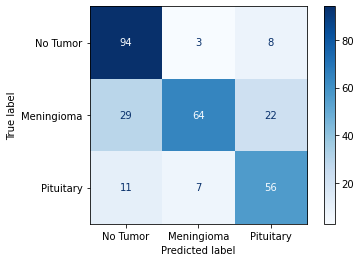

In [15]:
# Making the confusion matrices
cm = confusion_matrix(testClassifiers, pred_knn)
#target_names = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'] # Use this line if using Glioma
target_names = ['No Tumor', 'Meningioma', 'Pituitary'] # Use this line if not using Glioma
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()